# Tesla (TSLA) Stock Price prediction using Facebook Prophet

In [1]:
## Switch to GPU mode for faster Computation (Runtime> Change runtime> GPU)

## Importing all the necessary Libraries

In [2]:
#Necessary libraries = Pandas, fbprophet and plotly

#pandas= data Manipulation and analysis
#fbprophet = Forecasting
#plotly= data visualization


In [3]:
!pip install prophet
import prophet

In [4]:
from prophet import Prophet

In [5]:
import pandas as pd
import plotly.express as px

In [6]:
 #Initializing Plotly
 import plotly.io as pio
 pio.renderers.default ='colab'

## Importing the Dataset & Exploring it

In [7]:
df = pd.read_csv("TSLA.csv")

In [8]:
#read_csv function from pandas

In [9]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-08-07,22.922667,25.830667,22.610001,25.304667,25.304667,463137000
1,2018-08-08,24.606001,25.509333,24.474667,24.689333,24.689333,368568000
2,2018-08-09,24.370001,24.467333,23.048668,23.496668,23.496668,257757000
3,2018-08-10,23.600000,24.000000,23.066668,23.699333,23.699333,173280000
4,2018-08-13,24.075333,24.212667,23.268000,23.760668,23.760668,156958500
...,...,...,...,...,...,...,...
1252,2023-07-31,267.480011,269.079987,263.779999,267.429993,267.429993,84582200
1253,2023-08-01,266.260010,266.470001,260.250000,261.070007,261.070007,83166000
1254,2023-08-02,255.570007,259.519989,250.490005,254.110001,254.110001,101752900
1255,2023-08-03,252.039993,260.489990,252.000000,259.320007,259.320007,97569100


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1257 entries, 0 to 1256
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1257 non-null   object 
 1   Open       1257 non-null   float64
 2   High       1257 non-null   float64
 3   Low        1257 non-null   float64
 4   Close      1257 non-null   float64
 5   Adj Close  1257 non-null   float64
 6   Volume     1257 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 68.9+ KB


In [11]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1257.000000,1257.000000,1257.000000,1257.000000,1257.000000,1.257000e+03
mean,153.169591,156.695756,149.343597,153.111030,153.111030,1.362765e+08
std,113.268343,115.771284,110.430386,113.106242,113.106242,8.869259e+07
min,12.073333,12.445333,11.799333,11.931333,11.931333,2.940180e+07
25%,23.266666,23.589333,22.943333,23.328667,23.328667,7.911180e+07
50%,168.699997,174.500000,166.559998,169.910004,169.910004,1.090935e+08
75%,244.353333,249.766663,239.326660,244.130005,244.130005,1.649682e+08
max,411.470001,414.496674,405.666656,409.970001,409.970001,9.140820e+08


# Data Visualization using plotly express- Visualizing the historical performance of Tesla

In [12]:
#Line graph, Area graph , box plot (Analyzing price and volume)

In [13]:
px.area(df, x="Date", y="Close")

In [14]:
px.line(df, x="Date", y="Close")

In [15]:
px.area(df, x="Date", y="Volume")

In [16]:
px.bar(df, y="Volume")

In [17]:
px.box(df, y="Close")

# Understanding Facebook Prophet

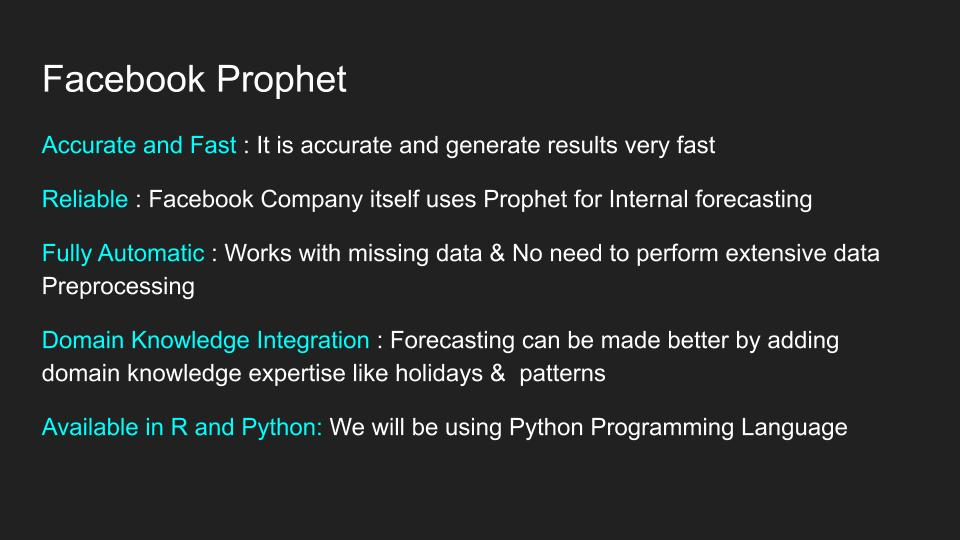

## Data Preperation

In [18]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-08-07,22.922667,25.830667,22.610001,25.304667,25.304667,463137000
1,2018-08-08,24.606001,25.509333,24.474667,24.689333,24.689333,368568000
2,2018-08-09,24.370001,24.467333,23.048668,23.496668,23.496668,257757000
3,2018-08-10,23.600000,24.000000,23.066668,23.699333,23.699333,173280000
4,2018-08-13,24.075333,24.212667,23.268000,23.760668,23.760668,156958500
...,...,...,...,...,...,...,...
1252,2023-07-31,267.480011,269.079987,263.779999,267.429993,267.429993,84582200
1253,2023-08-01,266.260010,266.470001,260.250000,261.070007,261.070007,83166000
1254,2023-08-02,255.570007,259.519989,250.490005,254.110001,254.110001,101752900
1255,2023-08-03,252.039993,260.489990,252.000000,259.320007,259.320007,97569100


In [19]:
columns = ['Date','Close']
ndf = pd.DataFrame(df, columns=columns)

In [20]:
ndf

,Date,Close
0,2018-08-07,25.304667
1,2018-08-08,24.689333
2,2018-08-09,23.496668
3,2018-08-10,23.699333
4,2018-08-13,23.760668
...,...,...
1252,2023-07-31,267.429993
1253,2023-08-01,261.070007
1254,2023-08-02,254.110001
1255,2023-08-03,259.320007


In [21]:
prophet_df = ndf.rename(columns={'Date':'ds','Close':'y'})

In [22]:
prophet_df

,ds,y
0,2018-08-07,25.304667
1,2018-08-08,24.689333
2,2018-08-09,23.496668
3,2018-08-10,23.699333
4,2018-08-13,23.760668
...,...,...
1252,2023-07-31,267.429993
1253,2023-08-01,261.070007
1254,2023-08-02,254.110001
1255,2023-08-03,259.320007


## Creating Facebook Prophet Model

In [23]:
m = Prophet()
m.fit(prophet_df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1ploenw2/clre77xh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1ploenw2/igd_cb0q.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=86209', 'data', 'file=/tmp/tmp1ploenw2/clre77xh.json', 'init=/tmp/tmp1ploenw2/igd_cb0q.json', 'output', 'file=/tmp/tmp1ploenw2/prophet_model1l8gad3m/prophet_model-20230820081915.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:19:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:19:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


##Forecasting

In [24]:
future = m.make_future_dataframe(periods=30)
forecast = m.predict(future)

In [25]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-08-07,16.945659,-20.720966,65.856506,16.945659,16.945659,4.067759,4.067759,4.067759,-1.955325,-1.955325,-1.955325,6.023084,6.023084,6.023084,0.0,0.0,0.0,21.013418
1,2018-08-08,16.958270,-22.543034,63.522970,16.958270,16.958270,4.427722,4.427722,4.427722,-1.438294,-1.438294,-1.438294,5.866016,5.866016,5.866016,0.0,0.0,0.0,21.385992
2,2018-08-09,16.970881,-20.940873,62.535134,16.970881,16.970881,3.742061,3.742061,3.742061,-1.963341,-1.963341,-1.963341,5.705402,5.705402,5.705402,0.0,0.0,0.0,20.712943
3,2018-08-10,16.983492,-26.080661,63.934254,16.983492,16.983492,3.108955,3.108955,3.108955,-2.428609,-2.428609,-2.428609,5.537564,5.537564,5.537564,0.0,0.0,0.0,20.092448
4,2018-08-13,17.021326,-21.940659,65.121530,17.021326,17.021326,4.480333,4.480333,4.480333,-0.479749,-0.479749,-0.479749,4.960082,4.960082,4.960082,0.0,0.0,0.0,21.501658
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1282,2023-08-30,182.568689,138.849668,225.672306,182.302122,182.843096,0.391338,0.391338,0.391338,-1.438294,-1.438294,-1.438294,1.829632,1.829632,1.829632,0.0,0.0,0.0,182.960027
1283,2023-08-31,182.392912,139.638678,227.558270,182.085891,182.707488,0.019567,0.019567,0.019567,-1.963341,-1.963341,-1.963341,1.982907,1.982907,1.982907,0.0,0.0,0.0,182.412479
1284,2023-09-01,182.217135,137.020538,222.800719,181.873155,182.571402,-0.226927,-0.226927,-0.226927,-2.428609,-2.428609,-2.428609,2.201682,2.201682,2.201682,0.0,0.0,0.0,181.990208
1285,2023-09-02,182.041357,144.958155,234.160626,181.652329,182.426726,6.616504,6.616504,6.616504,4.132660,4.132660,4.132660,2.483844,2.483844,2.483844,0.0,0.0,0.0,188.657862


In [26]:
px.line(forecast, x='ds', y='yhat')

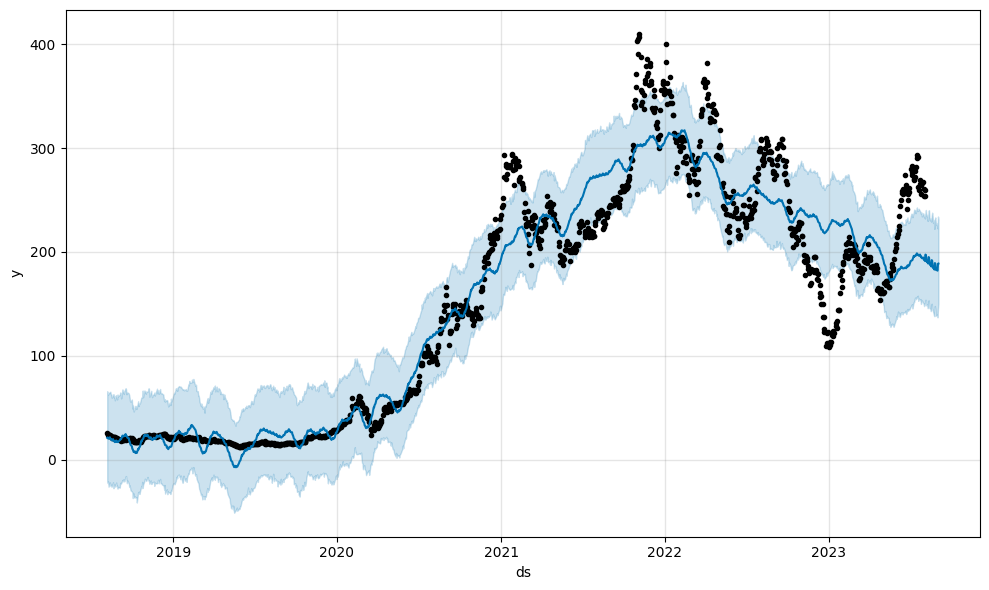

In [27]:
figure = m.plot(forecast,xlabel='ds', ylabel='y')

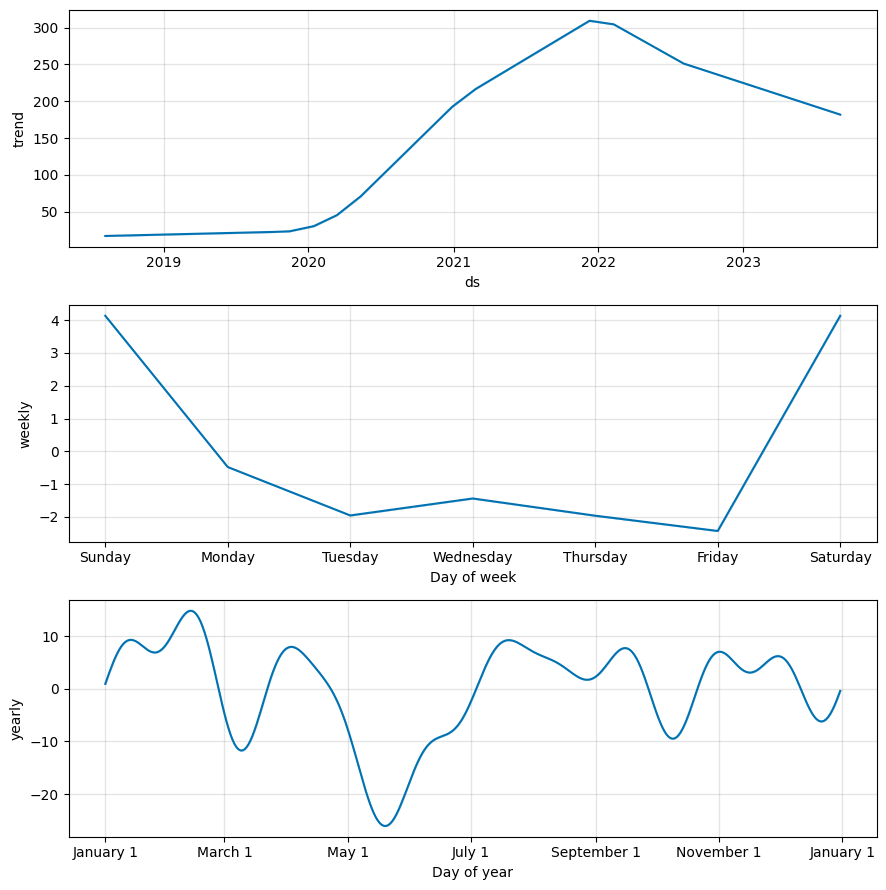

In [28]:
figure2 = m.plot_components(forecast)

##Downloading the Forecast data

In [29]:
from google.colab import files
forecast.to_csv('forecast.csv')
files.download('forecast.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>